In [ ]:
import numpy as np
import tensorflow as tf
import os

import matplotlib.pyplot as plt
#import cv2
#print("OpenCV-Python Version {}".format(cv2.__version__))
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
from tqdm import tqdm

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
path = '/content/drive/MyDrive/Colab Notebooks/Snake Images'

In [ ]:
train_dir = os.path.join(path,"train")
test_dir = os.path.join(path,"test")

In [ ]:
data_gen_train = ImageDataGenerator(rescale = 1/255.)
data_gen_test = ImageDataGenerator(rescale = 1/255.)

In [ ]:
# class_model = categorical หลายclass
train_generator= data_gen_train.flow_from_directory(train_dir,target_size = (128,128),batch_size = 128,class_mode = "binary")
test_generator= data_gen_test.flow_from_directory(test_dir,target_size = (128,128),batch_size = 128,class_mode = "binary")

Found 1782 images belonging to 2 classes.
Found 269 images belonging to 2 classes.


In [ ]:
test_generator[1]

(array([[[[1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          ...,
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ]],
 
         [[1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          ...,
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ]],
 
         [[1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          ...,
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ]],
 
         ...,
 
         [[1.        , 1.        , 1.        ],
          [1.     

In [ ]:
train_generator.image_shape

(128, 128, 3)

In [ ]:
train_generator.filenames

['Non Venomous/0 (2).jpg',
 'Non Venomous/0 (3).jpg',
 'Non Venomous/0 (4).jpg',
 'Non Venomous/0.jpg',
 'Non Venomous/03.jpg',
 'Non Venomous/03000025388_01_f.jpg',
 'Non Venomous/03000026774_01_f.jpg',
 'Non Venomous/03000026807_01_f.jpg',
 'Non Venomous/0431.jpg',
 'Non Venomous/0582.jpg',
 'Non Venomous/0604.jpg',
 'Non Venomous/0821.jpg',
 'Non Venomous/0835.jpg',
 'Non Venomous/0e07f0ba188cf87784d3c48f54e91ce3.jpg',
 'Non Venomous/1 (2).jpg',
 'Non Venomous/1 (3).jpg',
 'Non Venomous/1.jpg',
 'Non Venomous/10 (2).jpg',
 'Non Venomous/10 (3).jpg',
 'Non Venomous/10.jpg',
 'Non Venomous/100.jpg',
 'Non Venomous/101.jpg',
 'Non Venomous/102.jpg',
 'Non Venomous/11 (2).jpg',
 'Non Venomous/11.jpg',
 'Non Venomous/110298e9e9d6d2fdba1357f8ce37cb3b.jpg',
 'Non Venomous/11225995516_f9288eb60a_b.jpg',
 'Non Venomous/1170695.jpg',
 'Non Venomous/12 (2).jpg',
 'Non Venomous/12.jpg',
 'Non Venomous/1200px-Elaphe_quadrivirgata.JPG',
 'Non Venomous/1274635783_6d04848eae.jpg',
 'Non Venomous/12

In [ ]:
train_generator.num_classes

2

In [ ]:
class_n  = train_generator.classes
class_n

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [ ]:
class_n.shape

(1782,)

In [ ]:
class_names = ['NON_VENOMOUS', 'VENOMOUS']

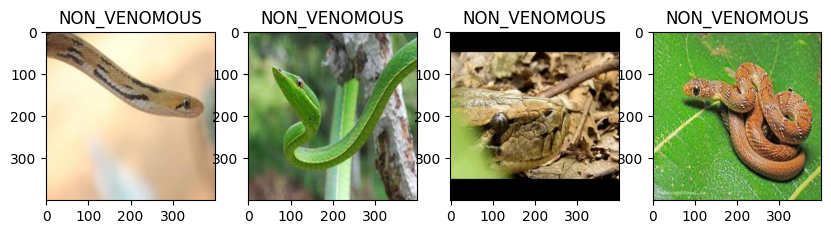

In [ ]:
import matplotlib.pyplot as plt
import os

src_path = "/content/drive/MyDrive/Colab Notebooks/Snake Images/train"
sub_train = os.listdir(src_path)
fig = plt.figure(figsize=(10,5))
for i in range(4):
    #path = os.path.join(src_path,sub_train[i])
    train_generator.filenames
    plt.subplot(240 + 1 + i)
    img = plt.imread(os.path.join(src_path,train_generator.filenames[i]))
    plt.title(class_names[train_generator.classes[i]])
    plt.imshow(img, cmap=plt.get_cmap('gray'))

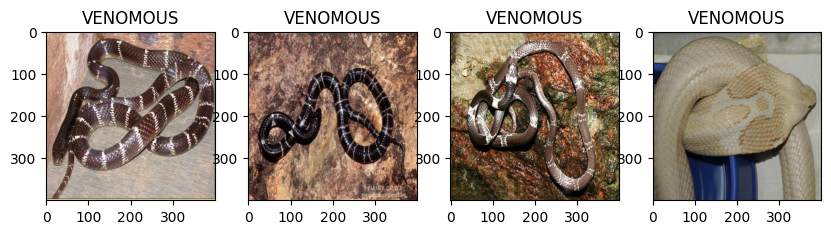

In [ ]:
fig = plt.figure(figsize=(10,5))
for i in range(4):
    #path = os.path.join(src_path,sub_train[i])
    train_generator.filenames
    plt.subplot(240 + 1 + i)
    img = plt.imread(os.path.join(src_path,train_generator.filenames[1000-i]))
    plt.title(class_names[train_generator.classes[1000-i]])
    plt.imshow(img, cmap=plt.get_cmap('gray'))

In [ ]:
base_model = tf.keras.applications.MobileNetV2(input_shape=(128,128,3),include_top = False, weights = "imagenet") # include_top= false บอกว่าเป็นการ fix weight and bias โ่ด่ย่่ให้มีการตัด   head  ออก

9406464/9406464 [==============================] - 0s 0us/step


In [ ]:
base_model.summary()

Model: "mobilenetv2_1.00_128"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 128, 128, 3)]        0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, 64, 64, 32)           864       ['input_1[0][0]']             
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, 64, 64, 32)           128       ['Conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 Conv1_relu (ReLU)           (None, 64, 64, 32)           0         ['bn_Conv1[

In [ ]:
base_model_trainable = False  #fix weight and bias ตาม model ต้นฉบับ

In [ ]:
# change head
average_pooling_layer = tf.keras.layers.GlobalAveragePooling2D()(base_model.output)
prediction_layer = tf.keras.layers.Dense(units=1,activation = 'sigmoid')(average_pooling_layer)

In [ ]:
model = tf.keras.models.Model(inputs=base_model.input, outputs = prediction_layer) #input    base ตัวเดิม   output    head เปลี่ยน

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 128, 128, 3)]        0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, 64, 64, 32)           864       ['input_1[0][0]']             
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, 64, 64, 32)           128       ['Conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 Conv1_relu (ReLU)           (None, 64, 64, 32)           0         ['bn_Conv1[0][0]']        

In [ ]:
model.compile(optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.0001),loss="binary_crossentropy",metrics=["accuracy"])

In [ ]:
history = model.fit(train_generator, batch_size=128,epochs=10,validation_data = test_generator)

Epoch 1/10
14/14 [==============================] - 479s 33s/step - loss: 0.5581 - accuracy: 0.7031 - val_loss: 0.4868 - val_accuracy: 0.7546
Epoch 2/10
14/14 [==============================] - 124s 9s/step - loss: 0.1671 - accuracy: 0.9697 - val_loss: 0.4773 - val_accuracy: 0.7695
Epoch 3/10
14/14 [==============================] - 134s 10s/step - loss: 0.0752 - accuracy: 0.9972 - val_loss: 0.5190 - val_accuracy: 0.7584
Epoch 4/10
14/14 [==============================] - 121s 9s/step - loss: 0.0304 - accuracy: 1.0000 - val_loss: 0.5381 - val_accuracy: 0.7770
Epoch 5/10
14/14 [==============================] - 129s 9s/step - loss: 0.0133 - accuracy: 1.0000 - val_loss: 0.6040 - val_accuracy: 0.7658
Epoch 6/10
14/14 [==============================] - 127s 9s/step - loss: 0.0074 - accuracy: 1.0000 - val_loss: 0.6530 - val_accuracy: 0.7770
Epoch 7/10
14/14 [==============================] - 144s 10s/step - loss: 0.0035 - accuracy: 1.0000 - val_loss: 0.6837 - val_accuracy: 0.7695
Epoch 8/10

Fine Turing

In [ ]:
len(base_model.layers)

154

In [ ]:
base_model.trainable = True

In [ ]:
for layer in base_model.layers[:100]:  #layer 0-100 จะ fix weight and bias เพราะส่วนนี้จะทำหน้าที่หาคุณลักษณะสำคัญของภาพเช่นขอบของภาพ
  layer.trainable = False

In [ ]:
model.compile(optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.0001),loss="binary_crossentropy",metrics=["accuracy"])

In [ ]:
history = model.fit(train_generator,epochs=50,validation_data = test_generator)

Epoch 1/50
14/14 [==============================] - 58s 4s/step - loss: 0.0713 - accuracy: 0.9764 - val_loss: 0.6758 - val_accuracy: 0.7844
Epoch 2/50
14/14 [==============================] - 52s 4s/step - loss: 0.0122 - accuracy: 0.9994 - val_loss: 0.6423 - val_accuracy: 0.7807
Epoch 3/50
14/14 [==============================] - 63s 4s/step - loss: 0.0052 - accuracy: 1.0000 - val_loss: 0.6784 - val_accuracy: 0.7881
Epoch 4/50
14/14 [==============================] - 49s 3s/step - loss: 0.0032 - accuracy: 1.0000 - val_loss: 0.7289 - val_accuracy: 0.7844
Epoch 5/50
14/14 [==============================] - 53s 4s/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 0.7279 - val_accuracy: 0.7881
Epoch 6/50
14/14 [==============================] - 49s 3s/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.7387 - val_accuracy: 0.8141
Epoch 7/50
14/14 [==============================] - 51s 4s/step - loss: 7.4290e-04 - accuracy: 1.0000 - val_loss: 0.7599 - val_accuracy: 0.8104
Epoch 8/50
14/14

In [ ]:
loss0, accuracy0 = model.evaluate(test_generator)

3/3 [==============================] - 4s 792ms/step - loss: 0.9506 - accuracy: 0.8216


In [ ]:
print("initial loss: {:.2f}".format(loss0))
print("initial accuracy: {:.2f}".format(accuracy0))

initial loss: 0.95
initial accuracy: 0.82


In [ ]:
probabilities = model.predict_generator(generator=test_generator)

<ipython-input-32-1cadbf1ed5b8>:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  probabilities = model.predict_generator(generator=test_generator)


In [ ]:
y_true = test_generator.classes

In [ ]:
y_pred = (probabilities > 0.5).astype("int32")

In [ ]:
y_pred

array([[1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
    

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, y_pred)
print(cm)

[[58 70]
 [66 75]]


In [ ]:
model.save("snake_model.h5")
print('saved model to disk')

In [ ]:
model.save('/content/drive/MyDrive/Colab Notebooks/snake_model.h5')
print('saved model to drive')

saved model to drive


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


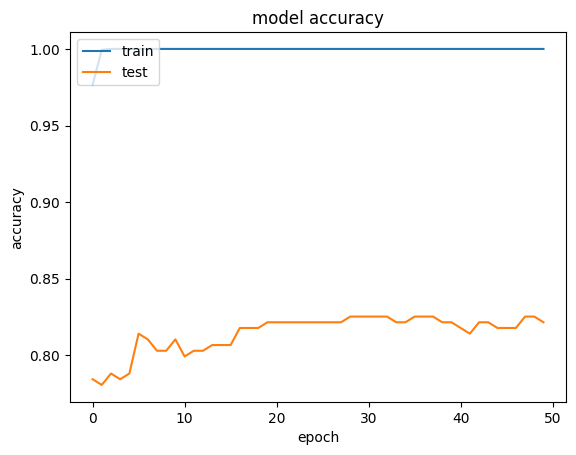

In [ ]:
print(history.history.keys())
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc = 'upper left')
plt.show()

In [ ]:
from numpy import loadtxt
from keras.models import load_model
#load model
model = load_model('snake_model.h5')
#summaize model
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 128, 128, 3)]        0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, 64, 64, 32)           864       ['input_1[0][0]']             
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, 64, 64, 32)           128       ['Conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 Conv1_relu (ReLU)           (None, 64, 64, 32)           0         ['bn_Conv1[0][0]']        

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


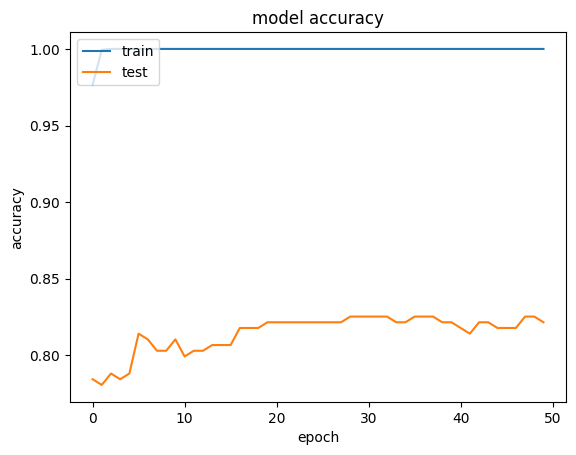

In [ ]:
print(history.history.keys())
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc = 'upper left')
plt.show()

# UNSEEN



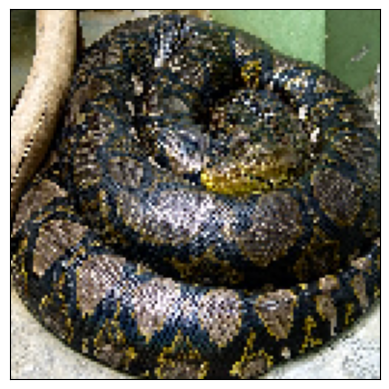

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.utils import load_img

x_new2 = load_img(
    '/content/unseen7.jpg',
    target_size=(128, 128),
)

# Convert the image to an array
x_new2_array = np.array(x_new2)

# Normalize the image array
x_new2_array = x_new2_array / 255.0  # Normalizing pixel values to be between 0 and 1

plt.xticks([])
plt.yticks([])
plt.imshow(x_new2_array)
plt.show()


In [ ]:
from tensorflow.keras.utils import img_to_array

x_new2 =  img_to_array(x_new2_array)
x_new2_re = x_new2.reshape(1, 128,128,3)
print("unseen shape", x_new2_re.shape)
predictions = model.predict(x_new2_re)
print(predictions)
classes_x = (predictions[0] > 0.5).astype("int32") #binary class
print('Your image ispredicted as a',class_names[classes_x[0]])
print( classes_x)
if classes_x == 0:
   print(' predicted as Non Venomous')
elif classes_x == 1:
  print("predicted as Venomous")
else:
  print('Not snake')

unseen shape (1, 128, 128, 3)
1/1 [==============================] - 0s 70ms/step
[[7.198183e-06]]
Your image ispredicted as a NON_VENOMOUS
[0]
 predicted as Non Venomous
